In [ ]:
# importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [ ]:
# uploading the dataset to google colab
from google.colab import files
uploaded = files.upload()

Saving Titanic-Dataset.csv to Titanic-Dataset.csv


In [ ]:
df = pd.read_csv('Titanic-Dataset.csv')

In [ ]:
df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
282,283,0,3,"de Pelsmaeker, Mr. Alfons",male,16.0,0,0,345778,9.5000,NaN,S
241,242,1,3,"Murphy, Miss. Katherine ""Kate""",female,NaN,1,0,367230,15.5000,NaN,Q
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
81,82,1,3,"Sheerlinck, Mr. Jan Baptist",male,29.0,0,0,345779,9.5000,NaN,S
37,38,0,3,"Cann, Mr. Ernest Charles",male,21.0,0,0,A./5. 2152,8.0500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
107,108,1,3,"Moss, Mr. Albert Johan",male,NaN,0,0,312991,7.7750,NaN,S
112,113,0,3,"Barton, Mr. David John",male,22.0,0,0,324669,8.0500,NaN,S
620,621,0,3,"Yasbeck, Mr. Antoni",male,27.0,1,0,2659,14.4542,NaN,C
224,225,1,1,"Hoyt, Mr. Frederick Maxfield",male,38.0,1,0,19943,90.0000,C93,S


In [ ]:
df.shape

(891, 12)

In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
# Handling missing values
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


In [ ]:
# Dropping the 'Cabin' column as it has too many missing values
df = df.drop('Cabin', axis=1)


In [ ]:
# dropping unnecessary columns
df = df.drop(['Name', 'Ticket', 'PassengerId'], axis=1)

In [ ]:
# Feature engineering in Family size
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1


In [ ]:
# Dropping 'SibSp' and 'Parch' as we have incorporated them into 'FamilySize'
df = df.drop(['SibSp', 'Parch'], axis=1)

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize
0,0,3,male,22.0,7.2500,S,2
1,1,1,female,38.0,71.2833,C,2
2,1,3,female,26.0,7.9250,S,1
3,1,1,female,35.0,53.1000,S,2
4,0,3,male,35.0,8.0500,S,1


In [ ]:
# Convert categorical variables
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

In [ ]:
df.head()

,Survived,Pclass,Age,Fare,FamilySize,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,7.2500,2,True,False,True
1,1,1,38.0,71.2833,2,False,False,False
2,1,3,26.0,7.9250,1,False,False,True
3,1,1,35.0,53.1000,2,False,False,True
4,0,3,35.0,8.0500,1,True,False,True


In [ ]:
# Converting boolean datatype to integer datatype
boolean_columns = df.select_dtypes(include=['bool']).columns
df[boolean_columns] = df[boolean_columns].astype(int)

In [ ]:
df.head()

,Survived,Pclass,Age,Fare,FamilySize,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,7.2500,2,1,0,1
1,1,1,38.0,71.2833,2,0,0,0
2,1,3,26.0,7.9250,1,0,0,1
3,1,1,35.0,53.1000,2,0,0,1
4,0,3,35.0,8.0500,1,1,0,1


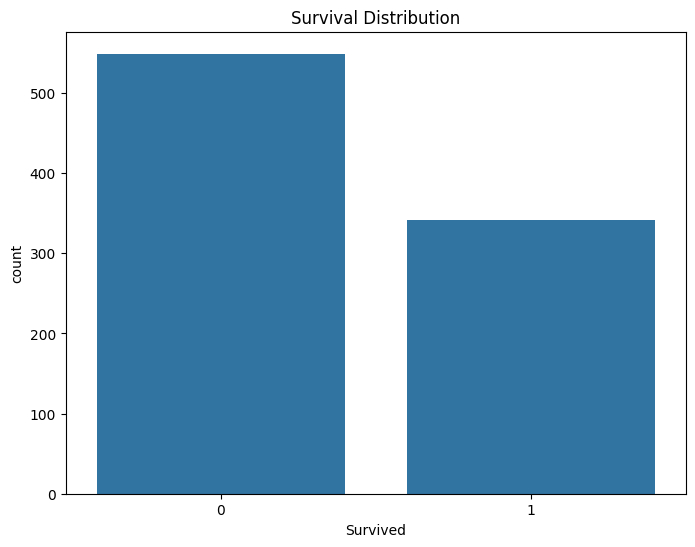

In [ ]:
# Plotting the distribution of the target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='Survived', data=df)
plt.title('Survival Distribution')
plt.show()

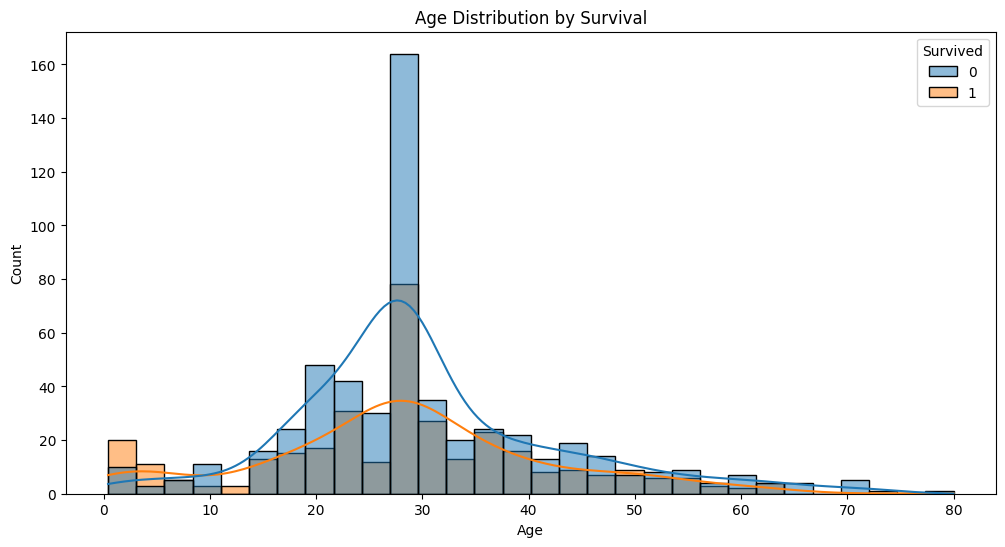

In [ ]:
# Plotting the distribution of Age with respect to Survived
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Age', hue='Survived', kde=True, bins=30)
plt.title('Age Distribution by Survival')
plt.show()

In [ ]:
# Split the data
X = df.drop('Survived', axis=1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
X_train

array([[-1.61413602,  1.25364106, -0.07868358, ...,  0.7243102 ,
        -0.30335547,  0.59248936],
       [-0.40055118, -0.47728355, -0.37714494, ...,  0.7243102 ,
        -0.30335547,  0.59248936],
       [ 0.81303367,  0.21508629, -0.47486697, ...,  0.7243102 ,
        -0.30335547,  0.59248936],
       ...,
       [ 0.81303367,  0.90745614, -0.35580399, ...,  0.7243102 ,
        -0.30335547,  0.59248936],
       [-1.61413602, -1.1696534 ,  1.68320121, ..., -1.38062393,
        -0.30335547,  0.59248936],
       [-1.61413602, -0.63114352,  0.86074761, ...,  0.7243102 ,
        -0.30335547,  0.59248936]])

In [ ]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest Classifier': RandomForestClassifier(n_estimators=100, random_state=42),
    'Decision Tree Classifier':  DecisionTreeClassifier(random_state=42),
    'KNN Classifier': KNeighborsClassifier(n_neighbors=4)
}

In [ ]:
# Train and evaluate models
result = {}
predictions = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    result[model_name] = accuracy
    predictions[model_name] = y_pred
    print(f'{model_name} - Accuracy: {accuracy}')
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

Logistic Regression - Accuracy: 0.8044692737430168
[[90 15]
 [20 54]]
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       105
           1       0.78      0.73      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179

Random Forest Classifier - Accuracy: 0.8212290502793296
[[91 14]
 [18 56]]
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       105
           1       0.80      0.76      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179

Decision Tree Classifier - Accuracy: 0.7821229050279329
[[84 21]
 [18 56]]
              precision    recall  f1-score   support

           0       0.82      0.80      0.81       105
           1     

In [ ]:
# Select the best model
best_model_name = max(result, key=result.get)
best_model = models[best_model_name]
print(f'Best model: {best_model_name} - Accuracy: {result[best_model_name]}')

Best model: Random Forest Classifier - Accuracy: 0.8212290502793296


In [ ]:
# Comparing the actual survival with predicted survival
best_model_predictions = predictions[best_model_name]
comparison_df = pd.DataFrame({'Actual Survival': y_test, 'Predicted Survival': best_model_predictions})
print(comparison_df)

     Actual Survival  Predicted Survival
709                1                   0
439                0                   0
840                0                   0
720                1                   1
39                 1                   0
..               ...                 ...
433                0                   0
773                0                   0
25                 1                   0
84                 1                   1
10                 1                   1

[179 rows x 2 columns]
